# Predict your own data - short version

### Imports

In [1]:
import os
if 'notebooks' in os.getcwd(): os.chdir('..')  # change to main directory
print('Current directory: {}'.format( os.getcwd() ))

from helper_scripts import checks
checks.check_packages()

import numpy as np
import matplotlib.pyplot as plt
import glob
# local folder
from helper_scripts import cascade

Current directory: /tf/mapped/Calibrated-inference-of-spiking
	YAML reader installed (version 0.16.10).


Using TensorFlow backend.


	Keras installed (version 2.3.1).
	Tensorflow installed (version 2.1.0).


In [2]:
# interactive plotting
%matplotlib notebook

# Load your own data

### Define your own function to load data as 2d array (neurons, time)

In [3]:
def load_neurons_x_time(file_path):
    """Custom method to load data as 2d array with shape (neurons, nr_timepoints)"""
    
    # replace this with your own code if necessary
    # traces = np.load(file_path)
    
    # # here numpy dictionary with key 'dff'
    traces = np.load(file_path, allow_pickle=True).item()['dff']
    
    # # Example of loading from .mat file with variable dF_traces
    # traces = sio.loadmat(file_path)['dF_traces'] 
    
    # # In case your data is in another format:
    # traces = traces.T        # transpose, if loaded matrix has shape (time, neurons)
    # traces = traces / 100    # normalize to fractions, in case df/f is in Percent
    
    # traces should be 2d array with shape (neurons, nr_timepoints)
    return traces

### Verify here that the loading function above works

Number of neurons in dataset: 325
Number of timepoints in dataset: 5475


<IPython.core.display.Javascript object>


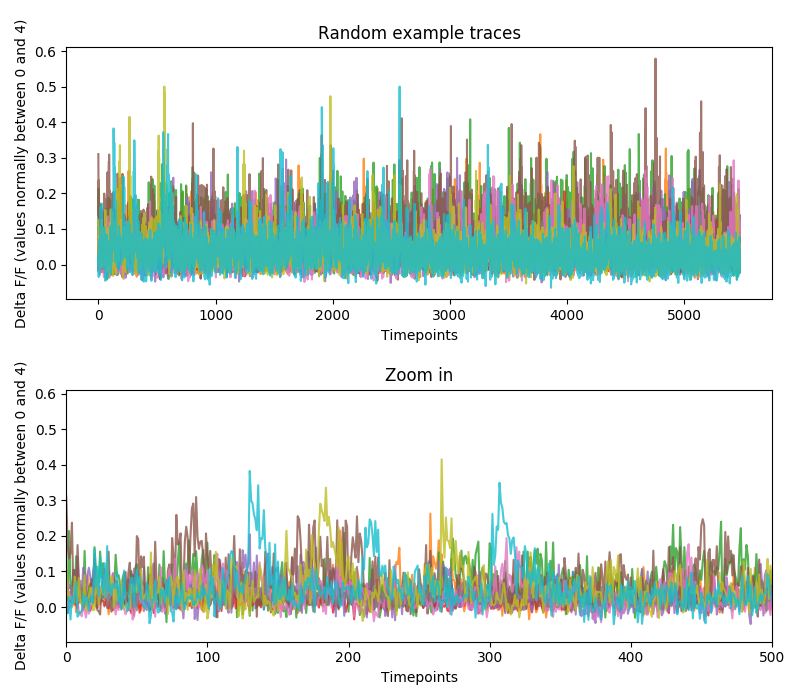

In [4]:
example_file = 'data/Jaguar_21_dff_nmf.npy'      # enter your test file here

traces = load_neurons_x_time( example_file )

print('Number of neurons in dataset:', traces.shape[0])
print('Number of timepoints in dataset:', traces.shape[1])

# plot traces for some neurons in loaded dataset
np.random.seed(3952)
random_neurons = np.random.randint(traces.shape[0], size=10)
plt.figure(figsize=(8,7))
plt.subplot(2,1,1)

for neuron in random_neurons:
    plt.plot(traces[neuron,:], alpha=0.8)
    
plt.xlabel('Timepoints')
plt.ylabel('Delta F/F (values normally between 0 and 4)')
plt.title('Random example traces')

# Zoom in
plt.subplot(2,1,2)
for neuron in random_neurons:
    plt.plot(traces[neuron,:], alpha=0.8)
    
plt.xlim(0, np.min((500, traces.shape[1])))
plt.title('Zoom in')
plt.xlabel('Timepoints')
plt.ylabel('Delta F/F (values normally between 0 and 4)')

plt.tight_layout()

# Infer spike rates 

In [5]:
model_name = 'GCaMP6s_6Hz_v2'
traces_file_name = 'data/Jaguar_21_dff_nmf.npy'  # enter your test file here

traces = load_neurons_x_time( traces_file_name )


In [6]:
spike_rates = cascade.predict( model_name, traces )

Loaded model was trained at frame rate 6 Hz
Given argument traces contains 325 neurons and 5475 frames.

Predictions for noise level 1:
	... ensemble 0
1007400/1007400 [==============================] - 40s 40us/step
	... ensemble 1
1007400/1007400 [==============================] - 41s 41us/step
	... ensemble 2
1007400/1007400 [==============================] - 42s 42us/step
	... ensemble 3
1007400/1007400 [==============================] - 43s 43us/step
	... ensemble 4
1007400/1007400 [==============================] - 40s 39us/step

Predictions for noise level 2:
	... ensemble 0
684375/684375 [==============================] - 30s 43us/step
	... ensemble 1
684375/684375 [==============================] - 28s 42us/step
	... ensemble 2
684375/684375 [==============================] - 28s 41us/step
	... ensemble 3
684375/684375 [==============================] - 27s 39us/step
	... ensemble 4
684375/684375 [==============================] - 25s 37us/step

Predictions for noise level 3:


### Save results to data file (.npy or .mat)

In [7]:
folder = os.path.dirname(traces_file_name)
save_path = os.path.join(folder, 'full_prediction_'+os.path.basename(traces_file_name))

# save as numpy file
np.save(save_path, spike_rates)

# save as .mat file
# import scipy
# scipy.io.savemat(save_path, {'spike_rates': spike_rates})

### Plot the results

<IPython.core.display.Javascript object>


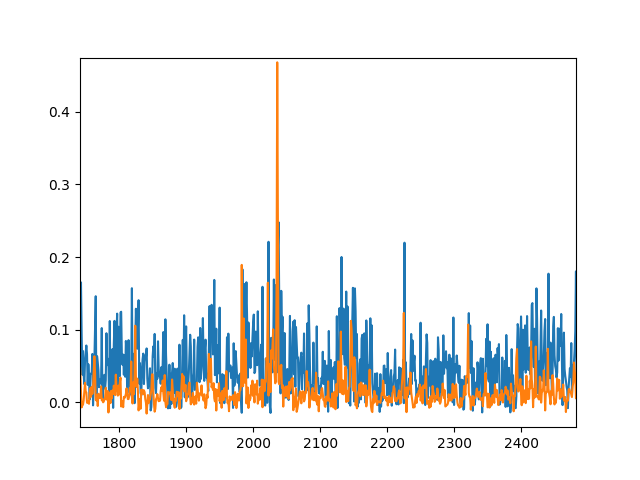

In [9]:
neuron = 5

plt.figure()

plt.plot(traces[neuron], label='Df/f')
plt.plot(spike_rates[neuron], label='Spike Rate')